In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

In [2]:
# complex number 
z = 3 + 4j

In [3]:
class Bintang:
    def __init__(self, name, magnitudo, ra, dec, distance_parsec, visibility):
        self.name = str(name)
        try:
            self.magnitudo = float(magnitudo)
        except ValueError:
            print("Magnitudo harus berupa angka")
        try:
            self.ra = float(ra) #right ascension
        except ValueError:
            print("RA harus berupa angka")
        try:
            self.dec = float(dec) #Declination
        except ValueError:
            print("Dec harus berupa angka")
        try:
            self.distance_parsec = float(distance_parsec)
        except ValueError:
            print("Jarak harus berupa angka")
        
        self.visibility = str(visibility)
    
    def magnitudo_absolut(self):
        """
        Menghitung magnitudo absolut bintang menggunakan rumus:
        M = m - 5 * log10(distance_parsec/10)
        """
        abs_mag = self.magnitudo - 5 * math.log10(self.distance_parsec/10)
        return abs_mag
        

In [4]:
class StarObservation:
    def __init__ (self):
        self.star = []
        self.observation_time = 0

    def add_star(self, star):
        
        if star.magnitudo < 6:
            if star.visibility == "clear":
                status = 'Observable'
            elif star.visibility == 'partly':
                status = "Marginal"
            else:
                status ="Not Observable"
            
            self.star.append(
                {
                    "bintang":star,
                    "status":status
                }
            )
            
            return True
        else:
            print(f"Magnitude {star.magnitudo} terlalu redup untuk teramati")
            return False
        
    def analyze_starts(self):
        observable_stars = [
            star for star in self.star if star['status'] == 'Observable'
        ]
        
        if len(observable_stars) > 0 :
            print("\nBintang yang dapat diamati:")
            for star in observable_stars:
                print(f"- {star['bintang'].name}(mag : {star['bintang'].magnitudo})")
        else:
            ("tidak ada bintang yangdapat diamati")

In [7]:
sirius = Bintang('Sirius', -1.46, 101.2871553, -16.7161159,2.637,'clear')
canopus = Bintang('Canopus', -0.74, 95.987877, -52.69566, 94.8, 'clear')
rigil_kentaurus = Bintang('Rigil Kentaurus', -0.27, 219.900262, -60.835, 1.34, 'partly')
_61_cygni_a = Bintang('61 Cygni A', 7.69, 315.322917, 38.989444,3.48, 'clear')
hd_140283 = Bintang('HD 140283', 7.205, 151.19875, -10.311111, 58.02, 'partly')

In [8]:
#magnitudo absolut
sirius_abs = sirius.magnitudo_absolut()
sirius_abs

1.4344493510328284

In [15]:
katalog_star = StarObservation()
katalog_star.add_star(sirius)
katalog_star.add_star(canopus)
katalog_star.add_star(rigil_kentaurus)
katalog_star.add_star(_61_cygni_a)
katalog_star.add_star(hd_140283)

Magnitude 7.69 terlalu redup untuk teramati
Magnitude 7.205 terlalu redup untuk teramati


False

In [16]:
katalog_star.analyze_starts()


Bintang yang dapat diamati:
- Sirius(mag : -1.46)
- Canopus(mag : -0.74)


In [1]:
#excercise python 1 : STring Manipulation
def analyze_star_name(star_name):
    amount_chat = len(star_name)
    capital_name = star_name.upper()
    lower_name = star_name.lower()
    cointains_a = 'a' in star_name
    return amount_chat, capital_name, lower_name, cointains_a

In [2]:
nama = analyze_star_name('Sirius')
print(f"Lenght : {nama[0]}")
print(f"Capital : {nama[1]}")
print(f"Lower : {nama[2]}")
print(f"Contains a : {nama[3]}")

Lenght : 6
Capital : SIRIUS
Lower : sirius
Contains a : False


In [3]:
def classify_star_brightness(magnitudo):
    if magnitudo < 0:
        return "Sangat Terang"
    elif magnitudo <= 0 and magnitudo < 2:
        return "Terang"
    elif magnitudo <= 2 and magnitudo < 4:
        return "Medium"
    elif magnitudo <= 4 and magnitudo < 6:
        return "Redup"
    else:
        return "Sangat Redup"

In [4]:
test_magnitudes = [-1.46, 0.03, 2.5, 4.8, 7.69]
for mag in test_magnitudes:
    print(f"Magnitudo {mag} tergolong {classify_star_brightness(mag)}")

Magnitudo -1.46 tergolong Sangat Terang
Magnitudo 0.03 tergolong Medium
Magnitudo 2.5 tergolong Redup
Magnitudo 4.8 tergolong Sangat Redup
Magnitudo 7.69 tergolong Sangat Redup


In [9]:
def filter_and_sort_stars(stars_data, max_magnitude, visibility):
    filtered_stars = [
        star for star in stars_data if star.get('magnitudo') < max_magnitude and star.get('visibility') == visibility
    ]
    
    sorted_stars = sorted(filtered_stars, key=lambda x: x.get('jarak'), reverse=True)
    sangat_terang = len([star for star in stars_data if star.get('visibility') =='sangat terang'])
    terang = len([star for star in stars_data if star.get('visibility') == 'terang'])
    medium = len([star for star in stars_data if star.get('visibility') == 'medium'])
    redup = len([star for star in stars_data if star.get('visibility') == 'redup'])
    
    return {
        "filtered_stars":filtered_stars,
        "sorted_stars":sorted_stars,
        "sangat_terang":sangat_terang,
        "terang":terang,
        "medium":medium,
        "redup":redup
    }

In [12]:
test_stars_data = [
    {
        "nama": "Sirius",
        "magnitudo": -1.46,
        "jarak": 2.637,
        "visibility": "sangat terang"
    },
    {
        "nama": "Canopus",
        "magnitudo": -0.74,
        "jarak": 94.8,
        "visibility": "sangat terang"
    },
    {
        "nama": "Arcturus",
        "magnitudo": -0.05,
        "jarak": 11.26,
        "visibility": "sangat terang"
    },
    {
        "nama": "Vega",
        "magnitudo": 0.03,
        "jarak": 25.04,
        "visibility": "terang"
    },
    {
        "nama": "Capella",
        "magnitudo": 0.08,
        "jarak": 13.1,
        "visibility": "terang"
    },
    {
        "nama": "Rigel",
        "magnitudo": 0.13,
        "jarak": 264.0,
        "visibility": "terang"
    },
    {
        "nama": "Procyon",
        "magnitudo": 0.34,
        "jarak": 3.51,
        "visibility": "terang"
    },
    {
        "nama": "Betelgeuse",
        "magnitudo": 0.42,
        "jarak": 197.0,
        "visibility": "terang"
    },
    {
        "nama": "Altair",
        "magnitudo": 2.21,
        "jarak": 5.13,
        "visibility": "medium"
    },
    {
        "nama": "Aldebaran",
        "magnitudo": 2.87,
        "jarak": 20.0,
        "visibility": "medium"
    },
    {
        "nama": "Antares",
        "magnitudo": 2.96,
        "jarak": 170.0,
        "visibility": "medium"
    },
    {
        "nama": "Spica",
        "magnitudo": 2.98,
        "jarak": 77.0,
        "visibility": "medium"
    },
    {
        "nama": "Pollux",
        "magnitudo": 3.14,
        "jarak": 10.4,
        "visibility": "medium"
    },
    {
        "nama": "Fomalhaut",
        "magnitudo": 4.16,
        "jarak": 7.7,
        "visibility": "redup"
    },
    {
        "nama": "Deneb",
        "magnitudo": 4.52,
        "jarak": 802.0,
        "visibility": "redup"
    },
    {
        "nama": "Mimosa",
        "magnitudo": 4.64,
        "jarak": 353.0,
        "visibility": "redup"
    },
    {
        "nama": "Regulus",
        "magnitudo": 4.87,
        "jarak": 24.3,
        "visibility": "redup"
    },
    {
        "nama": "Castor",
        "magnitudo": 5.01,
        "jarak": 15.6,
        "visibility": "redup"
    },
    {
        "nama": "Shaula",
        "magnitudo": 5.24,
        "jarak": 703.0,
        "visibility": "redup"
    },
    {
        "nama": "Gacrux",
        "magnitudo": 5.47,
        "jarak": 88.1,
        "visibility": "redup"
    }
]

# Test fungsi
result = filter_and_sort_stars(test_stars_data, 6.0, "redup")

# Print hasil
print("Bintang yang difilter (magnitude < 6.0, visibility: redup):")
for star in result["filtered_stars"]:
    print(f"Nama: {star['nama']}")
    print(f"Magnitudo: {star['magnitudo']}")
    print(f"Jarak: {star['jarak']} parsec")
    print(f"Visibility: {star['visibility']}")
    print()

print("Statistik visibility:")
print(f"Sangat Terang: {result['sangat_terang']}")
print(f"Terang: {result['terang']}")
print(f"Medium: {result['medium']}")
print(f"Redup: {result['redup']}")

Bintang yang difilter (magnitude < 6.0, visibility: redup):
Nama: Fomalhaut
Magnitudo: 4.16
Jarak: 7.7 parsec
Visibility: redup

Nama: Deneb
Magnitudo: 4.52
Jarak: 802.0 parsec
Visibility: redup

Nama: Mimosa
Magnitudo: 4.64
Jarak: 353.0 parsec
Visibility: redup

Nama: Regulus
Magnitudo: 4.87
Jarak: 24.3 parsec
Visibility: redup

Nama: Castor
Magnitudo: 5.01
Jarak: 15.6 parsec
Visibility: redup

Nama: Shaula
Magnitudo: 5.24
Jarak: 703.0 parsec
Visibility: redup

Nama: Gacrux
Magnitudo: 5.47
Jarak: 88.1 parsec
Visibility: redup

Statistik visibility:
Sangat Terang: 3
Terang: 5
Medium: 5
Redup: 7


In [13]:
def convert_coordinate(ra_str,dec_str):
    ra = ra_str.split(":")
    dec = dec_str.split(":")
    if len(ra) != 3 or len(dec) != 3:
        return "Format koordinat salah"
    try:
        ra_decimal = 15*(float(ra[0]) + float(ra[1])/60 + float(ra[2])/3600)
        dec_decimal = float(dec[0]) + float(dec[1])/60 + float(dec[2])/3600
    
        return ra_decimal, dec_decimal
    except ValueError :
        return "Format koordinat salah"

In [14]:
convert_coordinate("10:20:30", "-45:30:15")

(155.125, -44.49583333333333)

In [15]:
test_ra = "06h 45m 08.9s"
test_dec = "-16° 42' 58\""
convert_coordinate(test_ra, test_dec)

'Format koordinat salah'

In [5]:
class StarCatalog:
    def __init__(self, filename):
        self.filename = filename
    
    def save_to_file(self, stars_data):
        with open(self.filename, 'w') as file:
            file.write("nama,magnitudo,jarak,visibility,ra,dec\n")
            for star in stars_data:
                file.write(f"{star['nama']},{star['magnitudo']},{star['jarak']},{star['visibility']}, {star['ra']}, {star['dec']}\n")
    
    def load_from_file(self):
        stars_data = []
        with open(self.filename, 'r') as file:
            next(file)
            for line in file:
                data = line.strip().split(",")
                stars_data.append({
                    "nama": data[0],
                    "magnitudo": float(data[1]),
                    "jarak": float(data[2]),
                    "visibility": data[3],
                    "ra": data[4],
                    "dec": data[5]
                })
        return stars_data
    
    def add_star(self, star_data):
        stars_data = self.load_from_file()
        print(stars_data)
        stars_data.append(star_data)
        self.save_to_file(stars_data)
    
    def search_stars(self,criteria):
        stars_data = self.load_from_file()
        filtered_stars = []
        for star in stars_data:
            criteria_name = criteria.get('nama')
            criteria_magnitudo = criteria.get('magnitudo')
            criteria_jarak = criteria.get('jarak')
            criteria_visibility = criteria.get('visibility')
            criteria_ra = criteria.get('ra')
            criteria_dec = criteria.get('dec')
            
            if criteria_name and criteria_name.lower() not in star['nama'].lower():
                continue
            if criteria_magnitudo and (star['magnitudo'] > criteria_magnitudo[1] or star['magnitudo'] < criteria_magnitudo[0]):
                continue
            if criteria_jarak and (star['jarak'] > criteria_jarak[1] or star['jarak'] < criteria_jarak[0]):
                continue
            if criteria_visibility and star['visibility'] != criteria_visibility:
                continue
            if criteria_ra and star['ra'] != criteria_ra:
                continue
            if criteria_dec and star['dec'] != criteria_dec:
                continue
            filtered_stars.append(star)
        return filtered_stars
    
        
        

In [6]:
catalog = StarCatalog("stars.csv")
sirius = {
    "nama": "Sirius",
    "magnitudo": -1.46,
    "jarak": 2.637,
    "visibility": "sangat terang",
    "ra": "06h 45m 08.9s",
    "dec": "-16° 42' 58\""
}
canopus = {
    "nama": "Canopus",
    "magnitudo": -0.74,
    "jarak": 94.8,
    "visibility": "sangat terang",
    "ra": "06h 23m 57.1s",
    "dec": "-52° 41' 45\""
}

arcturus = {
    "nama": "Arcturus",
    "magnitudo": -0.054,
    "jarak": 11.26,
    "visibility": "sangat terang",
    "ra": "14h 15m 39.7s",
    "dec": "-19° 10' 57\""
}
catalog.save_to_file([sirius, canopus, arcturus])

In [11]:
new_star = {
    "nama": "Vega",
    "magnitudo": 0.03,
    "jarak": 25.04,
    "visibility": "terang",
    "ra": "18h 36m 56.3s",
    "dec": "+38° 47' 01\""
}

catalog.add_star(new_star)

[{'nama': 'Sirius', 'magnitudo': -1.46, 'jarak': 2.637, 'visibility': 'sangat terang', 'ra': ' 06h 45m 08.9s', 'dec': ' -16° 42\' 58"'}, {'nama': 'Canopus', 'magnitudo': -0.74, 'jarak': 94.8, 'visibility': 'sangat terang', 'ra': ' 06h 23m 57.1s', 'dec': ' -52° 41\' 45"'}, {'nama': 'Arcturus', 'magnitudo': -0.054, 'jarak': 11.26, 'visibility': 'sangat terang', 'ra': ' 14h 15m 39.7s', 'dec': ' -19° 10\' 57"'}]


In [7]:
# Example search criteria structures
criteria= {
    "visibility": "sangat terang",
    "nama":"ri" ,
    "magnitudo": (-2, 1),
    "jarak": (0, 50)
    
}

In [8]:
result = catalog.search_stars(criteria)
result

[{'nama': 'Sirius',
  'magnitudo': -1.46,
  'jarak': 2.637,
  'visibility': 'sangat terang',
  'ra': ' 06h 45m 08.9s',
  'dec': ' -16° 42\' 58"'}]

In [10]:
# Exercise 7: Star Object
# Buat class Star dengan:
# - Properties untuk semua atribut bintang
# - Method untuk menghitung magnitude absolut
# - Method untuk mengecek visibilitas
# - Method untuk membandingkan dengan bintang lain

class Star:
    def __init__(self, nama, apparent_magnitude, ra, dec, distance_parsec, visibility):
        # TODO: Implementasikan inisialisasi
        self.nama = nama
        self.apparent_magnitude = apparent_magnitude
        self.ra = ra
        self.dec = dec
        self.distance_parsec = distance_parsec
        self.visibility = visibility
    
    def absolute_magnitude(self):
        # TODO: Implementasikan perhitungan magnitude absolut
        return self.apparent_magnitude - 5 * math.log10(self.distance_parsec/10)
    
    def is_visible(self, min_magnitude):
        # TODO: Implementasikan pengecekan visibilitas
        return self.apparent_magnitude < min_magnitude
    
    def __lt__(self, other):
        # TODO: Implementasikan perbandingan bintang
        return self.absolute_magnitude() < other.absolute_magnitude()

In [11]:
def test_star_initialization():
    # Membuat beberapa objek Star dengan data yang berbeda
    sirius = Star(
        nama="Sirius",
        apparent_magnitude=-1.46,
        ra="06h 45m 08.9s",
        dec="-16° 42' 58\"",
        distance_parsec=2.637,
        visibility="sangat terang"
    )
    
    vega = Star(
        nama="Vega",
        apparent_magnitude=0.03,
        ra="18h 36m 56.3s",
        dec="+38° 47' 01\"",
        distance_parsec=25.04,
        visibility="terang"
    )
    
    # Memeriksa apakah properti tersimpan dengan benar
    print("Test Inisialisasi:")
    print(f"Nama Sirius: {sirius.nama == 'Sirius'}")
    print(f"Magnitude Sirius: {sirius.apparent_magnitude == -1.46}")
    print(f"Distance Sirius: {sirius.distance_parsec == 2.637}")
    print()
    
    return sirius, vega

# Test case 2: Perhitungan magnitude absolut
def test_absolute_magnitude(sirius, vega):
    # Menghitung magnitude absolut
    sirius_abs_mag = sirius.absolute_magnitude()
    vega_abs_mag = vega.absolute_magnitude()
    
    print("Test Magnitude Absolut:")
    print(f"Sirius absolute magnitude: {sirius_abs_mag:.2f}")  # Expected: sekitar 1.45
    print(f"Vega absolute magnitude: {vega_abs_mag:.2f}")     # Expected: sekitar 0.58
    print()
    
# Test case 3: Pengecekan visibilitas
def test_visibility(sirius, vega):
    # Test dengan berbagai batas magnitude
    print("Test Visibilitas:")
    print("Batas magnitude 0:")
    print(f"Sirius visible: {sirius.is_visible(0)}")  # Should be True
    print(f"Vega visible: {vega.is_visible(0)}")     # Should be False
    
    print("\nBatas magnitude 1:")
    print(f"Sirius visible: {sirius.is_visible(1)}")  # Should be True
    print(f"Vega visible: {vega.is_visible(1)}")     # Should be True
    print()

# Test case 4: Perbandingan bintang
def test_comparison(sirius, vega):
    print("Test Perbandingan:")
    print(f"Sirius lebih terang dari Vega: {sirius < vega}")  # Membandingkan absolute magnitude
    print(f"Vega lebih terang dari Sirius: {vega < sirius}")
    print()

# Menjalankan semua test
def run_all_tests():
    print("=== Menjalankan Test Suite untuk Class Star ===\n")
    
    # Membuat objek bintang untuk testing
    sirius, vega = test_star_initialization()
    
    # Menjalankan test lainnya
    test_absolute_magnitude(sirius, vega)
    test_visibility(sirius, vega)
    test_comparison(sirius, vega)

# Jalankan test
run_all_tests()

=== Menjalankan Test Suite untuk Class Star ===

Test Inisialisasi:
Nama Sirius: True
Magnitude Sirius: True
Distance Sirius: True

Test Magnitude Absolut:
Sirius absolute magnitude: 1.43
Vega absolute magnitude: -1.96

Test Visibilitas:
Batas magnitude 0:
Sirius visible: True
Vega visible: False

Batas magnitude 1:
Sirius visible: True
Vega visible: True

Test Perbandingan:
Sirius lebih terang dari Vega: False
Vega lebih terang dari Sirius: True



In [19]:
def analyze_star_statistic(stars_data):
    # menghitung statistik bintang
    data_total= []
    for star in stars_data:
        data_total.append(star.absolute_magnitude())
    data_total = np.array(data_total)
    mean = np.mean(data_total)
    median = np.median(data_total)
    modus = stats.mode(data_total)[0]
    std_dev = np.std(data_total)
    return mean, median, modus, std_dev
    

In [13]:
def plot_star_distribution(stars_data):
    #distribusi bintang berdasarkan jarak
    data_jarak = [star.distance_parsec for star in stars_data]
    plt.figure(figsize=(10,6))
    sns.histplot(data_jarak, bins=30, kde=True)
    plt.title("Distribusi Bintang Berdasarkan Jarak")
    plt.xlabel("Jarak (parsec)")
    plt.ylabel("Jumlah Bintang")
    plt.show()

In [14]:
def scatter_plot_jarak_magnitudo(stars_data):
    #scatter plot jarak vs magnitudo
    data_jarak = [star.distance_parsec for star in stars_data]
    data_magnitudo = [star.apparent_magnitude for star in stars_data]
    plt.figure(figsize=(10,6))
    plt.scatter(data_jarak, data_magnitudo, alpha=0.6)
    plt.title("Scatter Plot Jarak vs Magnitudo")
    plt.xlabel("Jarak (parsec)")
    plt.ylabel("Magnitudo")
    plt.yscale("log")
    plt.show()

In [15]:
def korelasi_jarak_magnitudo(stars_data):
    #korelasi jarak dan magnitudo
    data_jarak = [star.distance_parsec for star in stars_data]
    data_magnitudo = [star.apparent_magnitude for star in stars_data]
    corr = np.corrcoef(data_jarak, data_magnitudo)
    return corr[0,1]

In [20]:
stars = [
    Star(
        "Sirius", 
        -1.46, 
        "06h 45m 08.9s", 
        "-16° 42' 58\"", 
        2.637, 
        "sangat terang"
    ),
    Star(
        "Canopus", 
        -0.74, 
        "06h 23m 57.1s", 
        "-52° 41' 45\"", 
        94.8, 
        "sangat terang"
    ),
    Star(
        "Arcturus", 
        -0.05, 
        "14h 15m 39.7s", 
        "+19° 10' 57\"", 
        11.26, 
        "sangat terang"
    ),
    Star(
        "Vega", 
        0.03, 
        "18h 36m 56.3s", 
        "+38° 47' 01\"", 
        25.04, 
        "terang"
    ),
    Star(
        "Capella", 
        0.08, 
        "05h 16m 41.4s", 
        "+45° 59' 53\"", 
        13.1, 
        "terang"
    ),
    Star(
        "Rigel", 
        0.13, 
        "05h 14m 32.3s", 
        "-08° 12' 06\"", 
        264.0, 
        "terang"
    ),
    Star(
        "Procyon", 
        0.34, 
        "07h 39m 18.1s", 
        "+05° 13' 30\"", 
        3.51, 
        "terang"
    ),
    Star(
        "Betelgeuse", 
        0.42, 
        "05h 55m 10.3s", 
        "+07° 24' 25\"", 
        197.0, 
        "terang"
    ),
    Star(
        "Achernar", 
        0.46, 
        "01h 37m 42.9s", 
        "-57° 14' 12\"", 
        144.0, 
        "terang"
    ),
    Star(
        "Hadar", 
        0.61, 
        "14h 03m 49.4s", 
        "-60° 22' 22\"", 
        390.0, 
        "terang"
    ),
    Star(
        "Altair", 
        0.77, 
        "19h 50m 47.0s", 
        "+08° 52' 06\"", 
        5.13, 
        "terang"
    ),
    Star(
        "Aldebaran", 
        0.87, 
        "04h 35m 55.2s", 
        "+16° 30' 33\"", 
        20.0, 
        "terang"
    ),
    Star(
        "Antares", 
        0.96, 
        "16h 29m 24.5s", 
        "-26° 25' 55\"", 
        170.0, 
        "terang"
    ),
    Star(
        "Spica", 
        0.98, 
        "13h 25m 11.6s", 
        "-11° 09' 41\"", 
        77.0, 
        "terang"
    ),
    Star(
        "Pollux", 
        1.14, 
        "07h 45m 18.9s", 
        "+28° 01' 34\"", 
        10.4, 
        "sedang"
    ),
    Star(
        "Fomalhaut", 
        1.16, 
        "22h 57m 39.0s", 
        "-29° 37' 20\"", 
        7.7, 
        "sedang"
    ),
    Star(
        "Deneb", 
        1.25, 
        "20h 41m 25.9s", 
        "+45° 16' 49\"", 
        802.0, 
        "sedang"
    ),
    Star(
        "Regulus", 
        1.35, 
        "10h 08m 22.3s", 
        "+11° 58' 02\"", 
        24.3, 
        "sedang"
    ),
    Star(
        "Castor", 
        1.58, 
        "07h 34m 35.9s", 
        "+31° 53' 18\"", 
        15.6, 
        "sedang"
    ),
    Star(
        "Gacrux", 
        1.63, 
        "12h 31m 09.9s", 
        "-57° 06' 47\"", 
        88.1, 
        "sedang"
    )
]

In [21]:
analyze_star_statistic(stars)

(np.float64(-2.283414766726696),
 np.float64(-1.2991608005059332),
 np.float64(-8.270871841420817),
 np.float64(3.4289278565539556))

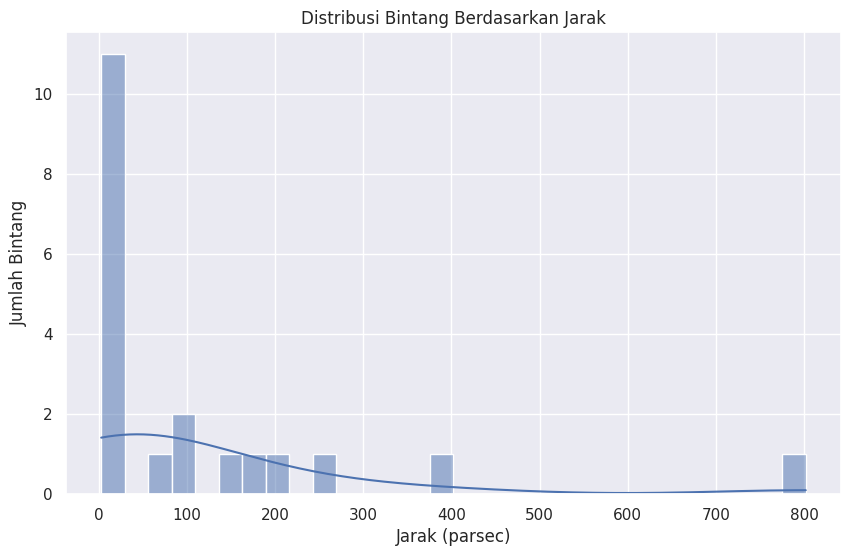

In [22]:
plot_star_distribution(stars)

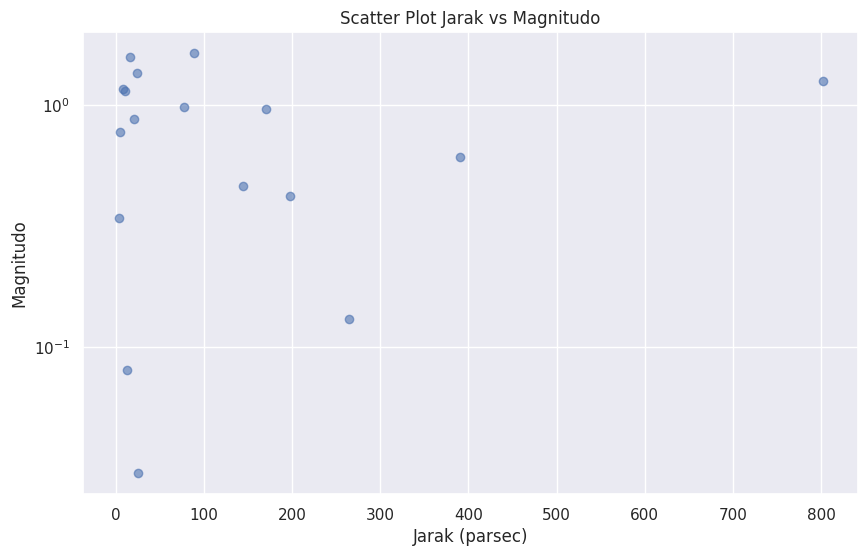

In [23]:
scatter_plot_jarak_magnitudo(stars)